# Support Vector Machines

pros:
- Effective in high dimensional spaces.

cons:
- Can overfit, if the number of features is much greater than the number of samples
- SVMs do not directly provide probability estimates

In [1]:
import shared.prepare as sp
import shared.classifier as sc
from sklearn import svm

X_train, y_train = sp.loadTrainNp("002_minst")
y_train_5 = (y_train == '5')
module = "002_minst-svc"

## linear

In [25]:
lin_clf = sp.loadModel(module, "lin_clf", lambda: svm.LinearSVC().fit(X_train, y_train_5))

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [26]:
lin_pred = sp.loadCross_pred(module, "lin_pred", lin_clf, X_train, y_train_5)
sc.precisionRecall_check(lin_clf, y=y_train_5, y_pred=lin_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[[52796  1783]
 [ 1122  4299]]

precision: 0.706839855310753
recall:    0.793027116768124
f1:        0.7474571850821525


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


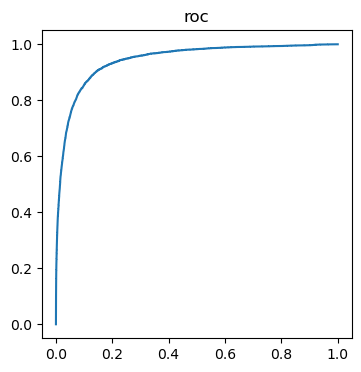

Area under: 0.9445887074720524


In [27]:
lin_scores = sp.loadCross_decisionFunction(module, "lin_scores", lin_clf, X_train, y_train_5)
sc.recallFallout_curve(lin_clf, X_train, y_train_5, lin_scores)

## rbf

In [28]:
rbf_clf = sp.loadModel(module, "rbf_clf", lambda: svm.SVC(kernel='rbf').fit(X_train, y_train_5))

In [29]:
rbf_pred = sp.loadCross_pred(module, "rbf_pred", rbf_clf, X_train, y_train_5)
sc.precisionRecall_check(rbf_clf, y=y_train_5, y_pred=rbf_pred)

[[54506    73]
 [  298  5123]]

precision: 0.9859507313317937
recall:    0.9450285925106069
f1:        0.9650560421964773


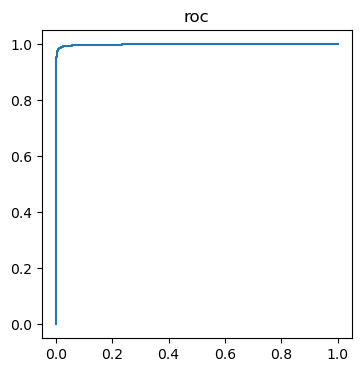

Area under: 0.9987231538270815


In [30]:
rbf_scores = sp.loadCross_decisionFunction(module, "rbf_scores", rbf_clf, X_train, y_train_5)
sc.recallFallout_curve(rbf_clf, X_train, y_train_5, rbf_scores)

### rbfStd

[[54490    89]
 [  447  4974]]

precision: 0.982421489235631
recall:    0.9175428887659104
f1:        0.9488744753910721


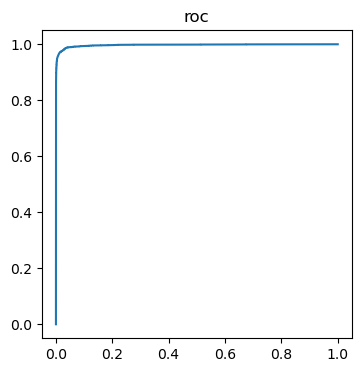

Area under: 0.9971849774111851


In [2]:
sc.check_binary(
  module, "rbfStd", 
  lambda: sp.make_standard(svm.SVC(kernel='rbf')).fit(X_train, y_train_5), 
  X=X_train, y=y_train_5)